<a href="https://colab.research.google.com/github/koushik395/Machine-Learning/blob/main/Edge_detection_using_Sobel%2CCanny_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AIM:Write a program for edge detection to extract edge based features from a sample image.**


### Import required Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt

### **Read an image**


##### OpenCV loads an image in BGR format by default. Matplotlib, however, reads in images as RGB. To display an image in matplotlib, we will need to convert the BGR format to RGB. 

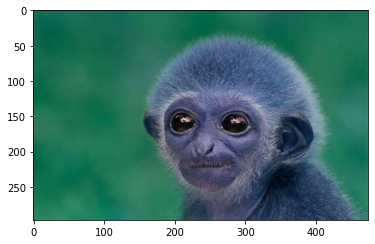

In [ ]:
img=cv2.imread("/content/animalForEdgeDetection1.jpg")
plt.imshow(img)

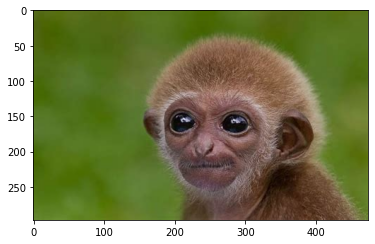

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #converting BGR format image to RGB format
plt.imshow(img)

### **Grayscale**
#### We will also be working with grayscale images. Grayscale images only have one color channel on the scale of 0 to 255, representing the brightness of that pixel, with 0 being totally dark (black) and 255 being totally bright (white).

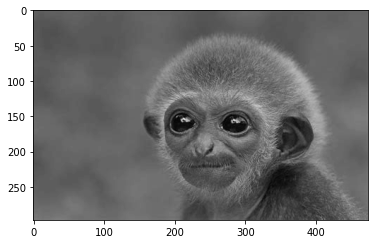

In [ ]:
img=cv2.imread("/content/animalForEdgeDetection1.jpg",0)
plt.imshow(img,cmap="gray")

### **Sobel filter**
#### The Sobel filter is used for edge detection. It works by calculating the gradient of image intensity at each pixel within the image.

##### **Parameters:**
cv2.Sobel (): 
The function cv2.Sobel (frame,cv2.CV_64F,1,0,ksize=5) 

can be written as

cv2.Sobel (original_image,ddepth,xorder,yorder,kernelsize)

where CV_64F means the numpy array dtype is float64 (64-bit floating-point).

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5776987a60>,
 Text(0.5, 1.0, 'along y-axis'))

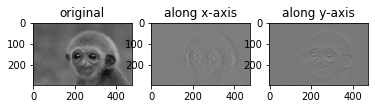

In [ ]:
img1=cv2.Sobel(img,cv2.CV_64F,1,0,4)
img2=cv2.Sobel(img,cv2.CV_64F,0,1,4)
plt.subplot(1,3,1),plt.imshow(img,cmap="gray"),plt.title("original")
plt.subplot(1,3,2),plt.imshow(img1,cmap="gray"),plt.title("along x-axis")
plt.subplot(1,3,3),plt.imshow(img2,cmap="gray"),plt.title("along y-axis")

###  **Canny Edge Detection**
#### The Canny Edge Detection algorithm is a widely used edge detection algorithm in today's image processing applications. It works in multiple stages. Canny edge detection algorithm produces smoother, thinner, and cleaner images.

**Parameters:**
cv2.Canny(img,150,200) can be rewritten as 

cv2.Canny(image,threshold1,threshold2)

where

image: Source/Input image of n-dimensional array.

threshold1: It is the High threshold value of intensity gradient.

threshold2: It is the Low threshold value of intensity gradient.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f577688b4f0>,
 Text(0.5, 1.0, 'Canny image'))

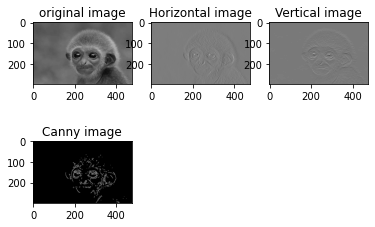

In [ ]:
img4=cv2.Canny(img,150,200)
plt.subplot(2,3,1),plt.imshow(img,cmap='gray'),plt.title("original image")
plt.subplot(2,3,2),plt.imshow(img1,cmap='gray'),plt.title("Horizontal image")
plt.subplot(2,3,3),plt.imshow(img2,cmap='gray'),plt.title("Vertical image")
plt.subplot(2,3,4),plt.imshow(img4,cmap='gray'),plt.title("Canny image")

## Edge detection with skimg Canny



In [ ]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

#### All images are matrices. It’s just a matter of how many dimensions they have. In the case of RGB images, we have 3 channels. Printing the shape attribute of our image (print(img1.shape)) we discover that image has the matrix shape (2475, 3024, 3). Let’s break this down. The first number is the number of rows (pixels) second is the number of columns (pixels), and the 3rd is the number of channels. In the case of RGB images, there are 3 channels — one for each color channel

In [ ]:
img1 = io.imread('/content/animalForEdgeDetection1.jpg')
img2 = io.imread('/content/naruto.png')
df = pd.DataFrame(['img1', 'img2'], columns=['Image'])
print(img1.shape, img2.shape)

(297, 474, 3) (1080, 1920, 4)


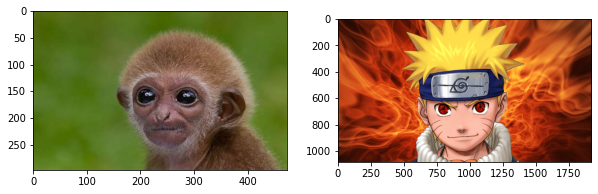

In [ ]:
fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(img2)

### **RGB Color Channels**
#### If wanted to get all red, green and blue information for the whole image, we repeated this process but select all rows and columns from the first two dimensions using the ‘:’ notation.

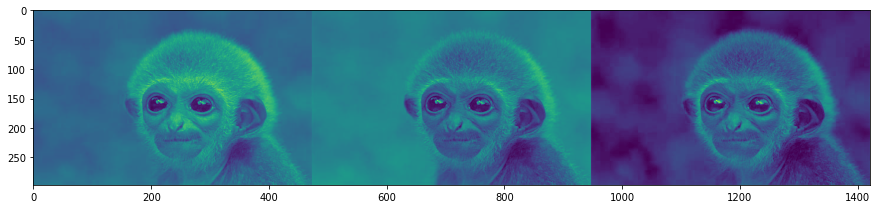

In [ ]:
img1_r = img1[:,:,0] # red channel values
img1_g = img1[:,:,1] # green channel values
img1_b = img1[:,:,2] # blue channel values
plot_image = np.concatenate((img1_r, img1_g, img1_b), axis=1)
plt.figure(figsize = (15,7))
plt.imshow(plot_image)

In [ ]:
from skimage.color import rgb2gray

cgs = rgb2gray(img1) #rgb format to gray scale format conersion
dgs = rgb2gray(img2)

print('Image shape:', cgs.shape, '\n')

# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (297, 474) 

2D image pixel map
[[0.4  0.4  0.4  ... 0.42 0.42 0.42]
 [0.4  0.39 0.39 ... 0.42 0.42 0.42]
 [0.39 0.39 0.39 ... 0.41 0.42 0.42]
 ...
 [0.49 0.48 0.48 ... 0.43 0.45 0.45]
 [0.5  0.49 0.49 ... 0.48 0.48 0.48]
 [0.5  0.49 0.48 ... 0.49 0.47 0.49]] 

Flattened pixel map: [0.4  0.4  0.4  ... 0.49 0.47 0.49]


<ipython-input-11-1264fa385d91>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  dgs = rgb2gray(img2)


(array([  8754.,  61774.,  82037., 117046., 134608., 108654., 101634.,
        134224.,  99435., 110196., 105696., 100590.,  93051.,  70132.,
         44012.,  63467.,  59363.,  64098.,  51527.,  42786.,  37633.,
         34167.,  60546.,  62015.,  51557., 108463.,  15949.,  18115.,
         18743.,  13328.]),
 array([0.01875176, 0.0513199 , 0.08388803, 0.11645616, 0.14902429,
        0.18159242, 0.21416055, 0.24672868, 0.27929681, 0.31186494,
        0.34443307, 0.3770012 , 0.40956933, 0.44213746, 0.47470559,
        0.50727373, 0.53984186, 0.57240999, 0.60497812, 0.63754625,
        0.67011438, 0.70268251, 0.73525064, 0.76781877, 0.8003869 ,
        0.83295503, 0.86552316, 0.89809129, 0.93065942, 0.96322756,
        0.99579569]),
 <a list of 30 Patch objects>)

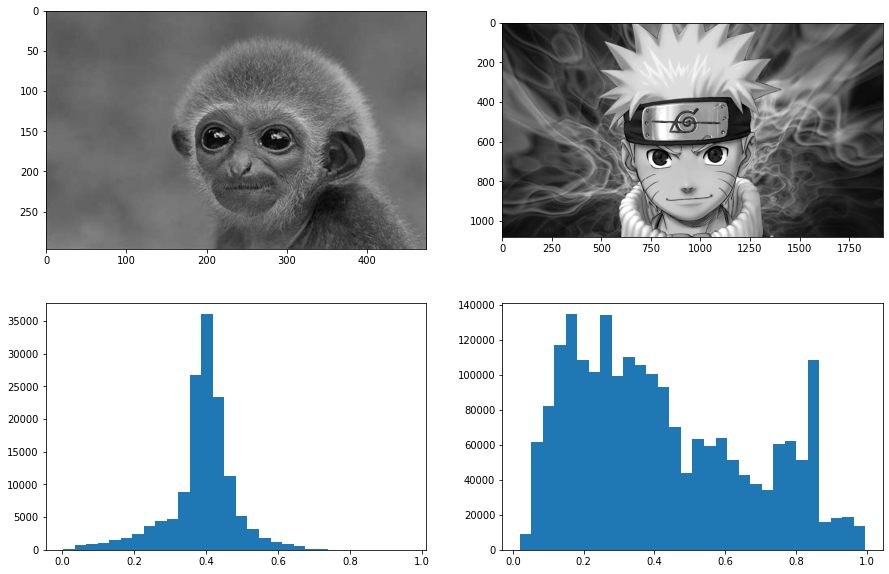

In [ ]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
ax4.hist(dgs.flatten(), bins=30)

#### This algorithm canny typically involves using a Gaussian distribution with a specific standard deviation σ (sigma) to smoothen and denoise the image.

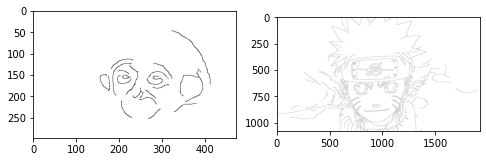

In [ ]:
from skimage.feature import canny

lion_edges = canny(cgs, sigma=3)
tiger_edges = canny(dgs, sigma=3)
 
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(lion_edges, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(tiger_edges, cmap='binary')